# 1. Univariate regression

Regression is one of the fundamental techniques that will help us to study the relationship between the different variables that are relevant to the questions that we are trying to answer. We will consider a use case where we have collected students average test grade scores and their respective average studied hours for the test for a group of similar IQ students.

## 1.1. Simple regression
The relationship between the dependent and the independent variable is modelled using a straight line (1st degree polynomial).

## Exercise 1: Import needed modules
Analyze the following code. Then, run it and answer the question.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Import linear regression function
import sklearn.linear_model as lm

# Import functions to calculate r-squared, MAE and RMSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**Question:**
1. What is the purpose of importing individual modules?

**Answer:**

## Exercise 2: Input data and basic statistics
In this exercise you will load the input data from the *.csv file, then you will check the correlation between variables and plot the scatter and distribution of the variables. Analyze the following code. Then, run it and answer the questions.

Mounted at /content/drive
   Hours_Studied  Test_Grade
0              2          57
1              3          66
2              4          73
3              5          76
4              6          79
5              7          81
6              8          90
7              9          96
8             10         100


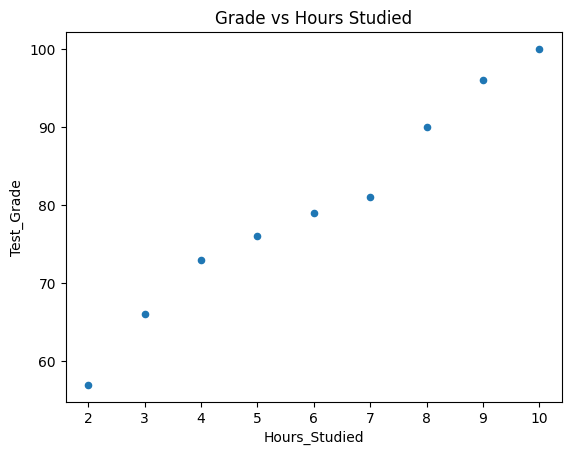


Correlation Matrix: 
               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.987797
Test_Grade          0.987797    1.000000


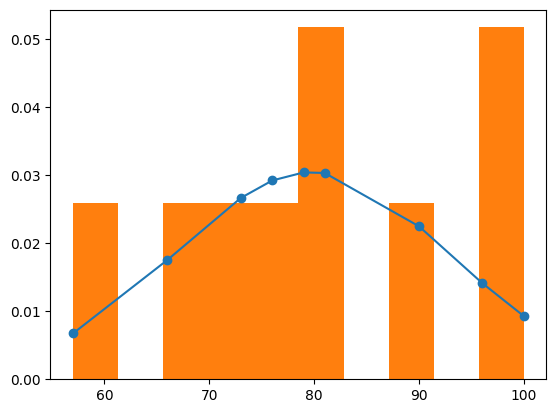

In [2]:
# Load data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab04/Grade_Set_1.csv')
print(df)

# Scatter plot
df.plot(kind = 'scatter', x = 'Hours_Studied', y = 'Test_Grade', title = 'Grade vs Hours Studied')
plt.show()

# Correlation between variables
print('\nCorrelation Matrix: ')
print(df.corr())

# Distribution plot (pdf - probability density function)
fit = stats.norm.pdf(df.Test_Grade, np.mean(df.Test_Grade), np.std(df.Test_Grade))
plt.plot(df.Test_Grade, fit, '-o')
plt.hist(df.Test_Grade, density = True)
plt.show()

**Questions:**
1. What kind of relationship between a dependent and an independent variable can be suspected based on the scatter plot?
2. What can you say about the correlation between the variables?
3. What can you say about the probability density distribution of the observations based on the distribution plot?

**Answers:**

## Exercise 3: Create a model
Analyze the following code. Then, run it and answer the questions.

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Create the linear regression object
lr = lm.LinearRegression()

x = df.Hours_Studied.values.reshape(-1, 1) # Independent variable
y = df.Test_Grade.values                   # Dependent variable

# Train the model using the training sets
lr.fit(x, y)

print('Intercept (c): ', lr.intercept_)
print('Coefficient (m): ', lr.coef_)

Intercept (c):  49.67777777777776
Coefficient (m):  [5.01666667]


In [6]:
c = 49.67777777777776
m = 5.01666667

Manual prediction: 79.77777779777776
Using predict function: [79.77777778]


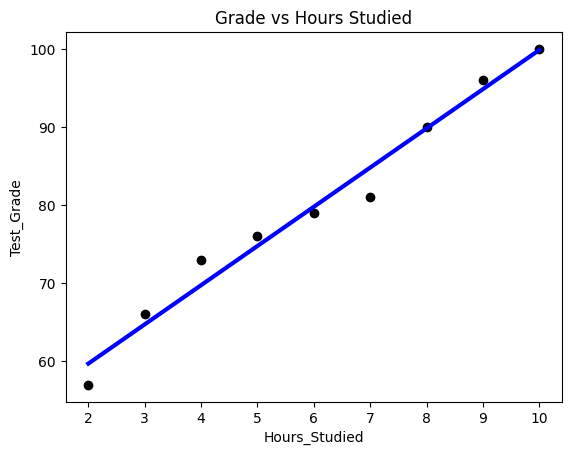

In [7]:
# Manual prediction for a given value of x
X = 6 # Hours Studied
print('Manual prediction:', c + m * X) # Insert appropriate values for c and m

# Predict using the built-in predict() function
print('Using predict function:', lr.predict([[6]]))

# Plot the fitted line
plt.scatter(x, y, color = 'black')
plt.plot(x, lr.predict(x), color = 'blue', linewidth = 3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
plt.show()

**Questions:**
1. How do you assess the results of manual prediction and with the predict() function?
2. What will the test result be if the student prepares for 8 hours?

**Answers:**

In [9]:
X = 8
print('Manual prediction:', c + m * X)
print('Using predict function:', lr.predict([[8]]))


Manual prediction: 89.81111113777777
Using predict function: [89.81111111]


## Exercise 4: Evaluate a model
Analyze the following code. Then, run it and answer the questions.

In [10]:
# Add predicted value to the data frame
df['Test_Grade_Pred'] = lr.predict(x)

# Calculating R-squared manually
df['SST'] = np.square(df['Test_Grade'] - df['Test_Grade'].mean())
df['SSR'] = np.square(df['Test_Grade_Pred'] - df['Test_Grade'].mean())

print('Sum of SSR:', df['SSR'].sum())
print('Sum of SST:', df['SST'].sum())
print()

print(df)
df.to_csv('r-squared.csv', index = False)

print('\nR-squared using manual calculation:', df['SSR'].sum() / df['SST'].sum())

# The use of the built-in function
print('R-squared using built-in function:', r2_score(df.Test_Grade,  df.Test_Grade_Pred))
print('Mean Absolute Error:', mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

Sum of SSR: 1510.0166666666673
Sum of SST: 1547.5555555555557

   Hours_Studied  Test_Grade  Test_Grade_Pred         SST         SSR
0              2          57        59.711111  518.827160  402.671111
1              3          66        64.727778  189.827160  226.502500
2              4          73        69.744444   45.938272  100.667778
3              5          76        74.761111   14.271605   25.166944
4              6          79        79.777778    0.604938    0.000000
5              7          81        84.794444    1.493827   25.166944
6              8          90        89.811111  104.493827  100.667778
7              9          96        94.827778  263.160494  226.502500
8             10         100        99.844444  408.938272  402.671111

R-squared using manual calculation: 0.9757431074095351
R-squared using built-in function: 0.9757431074095347
Mean Absolute Error: 1.618518518518523
Root Mean Squared Error: 2.0422995995497297


**Questions:**
1. How do you interpret the model evaluation metrics used?
2. How much can a built model be mistaken in predicting the test grade? How will you determine this accuracy?

**Answers:**

## Exercise 5: Outliers
Now, we'll introduce an outlier i.e., a student has studied 5 hours and scored 100. Assume that this student has higher IQ than others in this group. Notice the drop in R-squared value. So it is important to apply business logic to avoid including outliers in the training dataset to generalize the model and increase accuracy. Analyze the following code. Then, run it and answer the questions.

In [11]:
# Load data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab04/Grade_Set_1.csv')

df.loc[3] = np.array([5, 100])

x = df.Hours_Studied.values.reshape(-1, 1) # Independent variable
y = df.Test_Grade.values            # Dependent variable

# Train the model using the training sets
lr.fit(x, y)
print('Intercept (c):', lr.intercept_)
print('Coefficient (m):', lr.coef_)

Intercept (c): 54.74444444444443
Coefficient (m): [4.61666667]


In [12]:
c = 54.74444444444443
m = 4.61666667

Manual prediction: 82.44444446444443
Using predict function: [82.44444444]


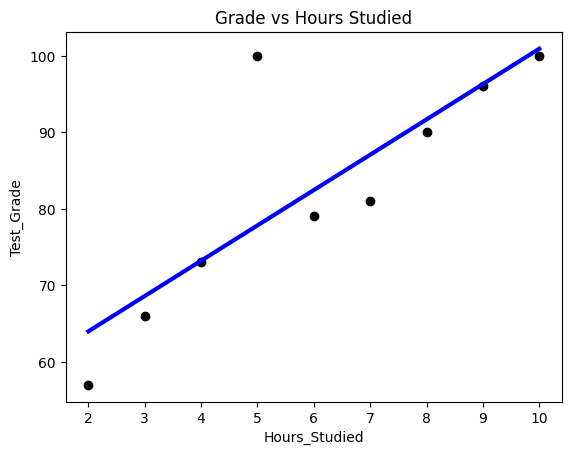

R-squared: 0.6808654756270704
Mean Absolute Error: 4.9271604938271585
Root Mean Squared Error: 8.16092012483584


In [14]:
# Manual prediction for a given value of x
X = 6 # Hours Studied
print('Manual prediction:', c + m * X) # Insert appropriate values for c and m

# Predict using the built-in predict() function
print('Using predict function:', lr.predict([[6]]))

# Plot the fitted line
plt.scatter(x, y, color = 'black')
plt.plot(x, lr.predict(x), color = 'blue', linewidth = 3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
plt.show()

# Add predicted value to the data frame
df['Test_Grade_Pred'] = lr.predict(x)

# The use of the built-in function
print('R-squared:', r2_score(df.Test_Grade,  df.Test_Grade_Pred))
print('Mean Absolute Error:', mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

**Questions:**
1. How have the model evaluation metrics changed when an outlier is added to the data set?
2. How should outlier values be handled and why?

**Answers:**

## 1.2. Polynomial regression
Relationship between the dependent and the independent variable is modelled using a curve (nth degree polynomial).

## Exercise 6: Polynomial plots
Analyze the following code. Then, run it and see the plots of polynomials.

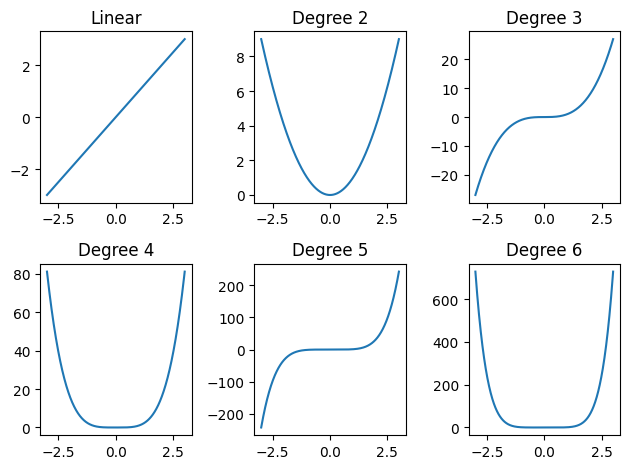

In [15]:
x = np.linspace(-3, 3, 1000)

# Plot subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)

ax1.plot(x, x)
ax1.set_title('Linear')
ax2.plot(x, x**2)
ax2.set_title('Degree 2')
ax3.plot(x, x**3)
ax3.set_title('Degree 3')
ax4.plot(x, x**4)
ax4.set_title('Degree 4')
ax5.plot(x, x**5)
ax5.set_title('Degree 5')
ax6.plot(x, x**6)
ax6.set_title('Degree 6')

# Tidy layout
plt.tight_layout()

## Exercise 7: Input data and basic statistics
Let’s consider another set of students average test grade scores and their respective average studied hours for similar IQ students. We will check the correlation between variables and plot the scatter of the variables. Analyze the following code. Then, run it and answer the questions.

    Hours_Studied  Test_Grade
0             0.5          20
1             1.0          21
2             2.0          22
3             3.0          23
4             4.0          25
5             5.0          37
6             6.0          48
7             7.0          56
8             8.0          67
9             9.0          76
10           10.0          90
11           11.0          89
12           12.0          90


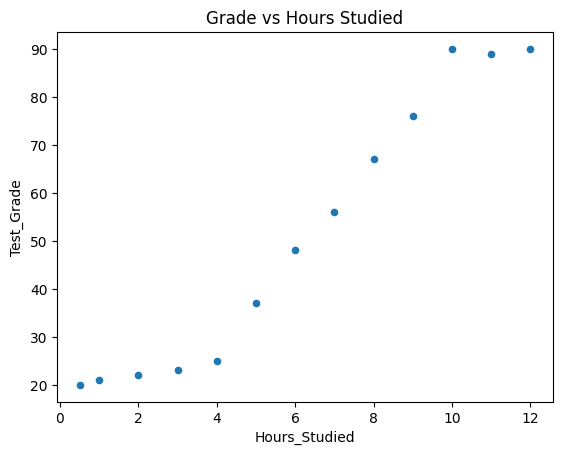


Correlation Matrix: 
               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.974868
Test_Grade          0.974868    1.000000


In [16]:
# Load data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Lab04/Grade_Set_2.csv')
print(df)

# Scatter plot
df.plot(kind = 'scatter', x = 'Hours_Studied', y = 'Test_Grade', title = 'Grade vs Hours Studied')
plt.show()

# Correlation between variables
print('\nCorrelation Matrix: ')
print(df.corr())

**Questions:**
1. What kind of relationship between a dependent and an independent variable can be suspected based on the scatter plot?
2. What can you say about the correlation between the variables?

**Answers:**

## Exercise 8: Create a model
Analyze the following code. Then, run it and answer the question.

In [17]:
# Create the linear regression object
lr = lm.LinearRegression()

x = df.Hours_Studied.values.reshape(-1, 1) # Independent variable
y = df.Test_Grade                   # Dependent variable

# Train the model using the training sets
lr.fit(x, y)

print('Intercept (c):', lr.intercept_)
print('Coefficient (m):', lr.coef_)

Intercept (c): 7.27106067219556
Coefficient (m): [7.25447403]


In [18]:
c = 7.27106067219556
m = 7.25447403

Manual prediction: 50.79790485219556
Using predict function: [50.79790485]


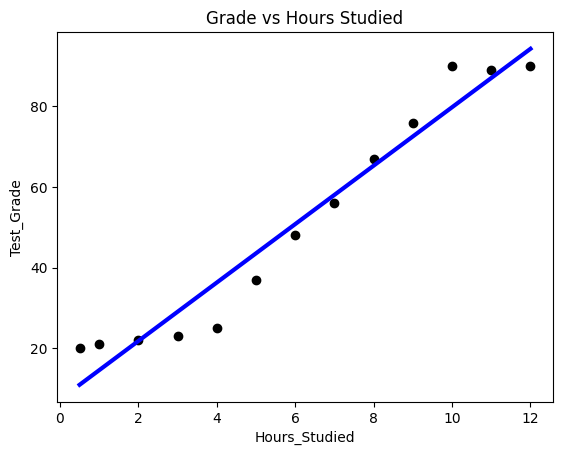

R-squared: 0.9503677766997879


In [19]:
# Manual prediction for a given value of x
X = 6 # Hours Studied
print('Manual prediction:', c + m * X) # Insert appropriate values for c and m

# Predict using the built-in predict() function
print('Using predict function:', lr.predict([[6]]))

# Plot the fitted line
plt.scatter(x, y, color = 'black')
plt.plot(x, lr.predict(x), color = 'blue', linewidth = 3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
plt.show()

print('R-squared:', r2_score(y, lr.predict(x)))

**Question:**
1. How has the R-squared changed compared to the Grade_Set_1 set?

**Answer:**

# Exercise 9: Evaluate a model
We will now evaluate the model for different degrees of polynomial used for modelling the relationship between the dependent and independent variable. In order to simplify calculations, we will use the NumPy's **vander** function that returns powers of the input vector. Analyze the following code. Then, run it and answer the questions.

R-squared for degree 1 = 0.9503677766997879
R-squared for degree 2 = 0.9608726568678714
R-squared for degree 3 = 0.9938323120374665
R-squared for degree 4 = 0.9955000184096712
R-squared for degree 5 = 0.9956204913897357


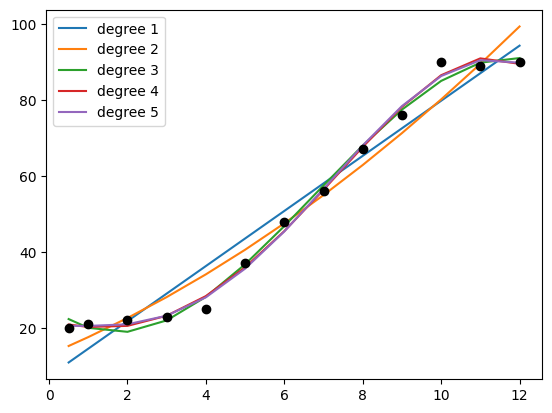

In [20]:
x = df.Hours_Studied # Independent variable

for deg in range(1, 6):
    lr.fit(np.vander(x, deg + 1), y);
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label = 'degree ' + str(deg));
    plt.legend(loc = 2);
    print('R-squared for degree ' + str(deg) + ' =',  r2_score(y, y_lr))
plt.plot(x, y, 'ok')
plt.show()

**Questions:**
1. When analysing R-squared values, which polynomial degree do you think is optimal for modelling the relationship between the dependent and independent variable? Justify your answer.
2. What is the meaning of the **'ok'** argument, which is passed on to the **plot()** function?

**Answers:**

## Exercise 10: Create an optimal model
Build the optimal model using the polynomial degree you selected in exercise 9. To do this, set the appropriate value for the **degree** variable. Analyze the following code. Then, run it and answer the questions.

In order to simplify calculations, we will use the **PolynomialFeatures()** function that generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form **[a, b]**, the **degree-2** polynomial features are **[1, a, b, \\(a^2\\), ab, \\(b^2\\)]**.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = df.Hours_Studied.values.reshape(-1, 1) # Independent variable
y = df.Test_Grade                   # Dependent variable

degree = ? # Set the appropriate value
model = make_pipeline(PolynomialFeatures(degree), lr)

model.fit(x, y)

plt.scatter(x, y, color = 'black')
plt.plot(x, model.predict(x), color = 'green')
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
plt.show()

print('R-squared using built-in function:', r2_score(y, model.predict(x)))

**Questions:**
1. What will the test result be if the student prepares for 6 hours? The code that will calculate this write below.
2. What is a difference in predicting the test result for 6 hours of studying compared to the model using the 1st degree polynomial?
3. Which value is more accurate and why?

**Answers:**